In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import json
 

def getReviews(page_url):
    
    #Parse the page using BeautifulSoup
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(page_url, headers = user_agent)
    reviews = BeautifulSoup(response.text, 'html.parser')
    
    script = reviews.find_all('script')[16]
    
    #data = script["review"]
    return script 

In [2]:
# enter your url
page_url = ('https://www.yelp.com/biz/the-cheesecake-factory-jersey-city-jersey-city-3?start=10')
reviews = getReviews(page_url)

reviews

<script data-apollo-state="ec228c56-e8cf-47be-9893-f8ec1acdbc9d" type="application/json"><!--{&quot;ROOT_QUERY&quot;:{&quot;loggedInUser&quot;:null,&quot;webConsumerFooter({\&quot;baseUrl\&quot;:\&quot;https:&#x2F;&#x2F;www.yelp.com&#x2F;\&quot;,\&quot;urlOptions\&quot;:{}})&quot;:{&quot;type&quot;:&quot;id&quot;,&quot;generated&quot;:true,&quot;id&quot;:&quot;$ROOT_QUERY.webConsumerFooter({\&quot;baseUrl\&quot;:\&quot;https:&#x2F;&#x2F;www.yelp.com&#x2F;\&quot;,\&quot;urlOptions\&quot;:{}})&quot;,&quot;typename&quot;:&quot;WebConsumerFooter&quot;},&quot;thirdPartyConfig&quot;:{&quot;type&quot;:&quot;id&quot;,&quot;generated&quot;:true,&quot;id&quot;:&quot;$ROOT_QUERY.thirdPartyConfig&quot;,&quot;typename&quot;:&quot;ThirdPartyConfig&quot;},&quot;webConsumerFooter&quot;:{&quot;type&quot;:&quot;id&quot;,&quot;generated&quot;:true,&quot;id&quot;:&quot;$ROOT_QUERY.webConsumerFooter&quot;,&quot;typename&quot;:&quot;WebConsumerFooter&quot;},&quot;business({\&quot;encid\&quot;:\&quot;cGvQz6b

In [3]:
html_content = reviews.prettify()

# HTML Content for Cheesecake Factory

In [4]:
import re
import json
import pandas as pd 

#p = re.compile('(?<=\[)(.*)(?=])')
rev = re.compile('(?<=full&quot;:&quot;).*?(?=&quot)')
rat = re.compile('(?<=\d,&quot;rating&quot;:).*?(?=,&quot;)')
aut = re.compile('(?<=node.author&quot;:{&quot;displayName&quot;:&quot;).*?(?=&quot;)')

In [5]:
#res = p.search(html_content)

In [6]:
author = aut.findall(html_content)
reviews = rev.findall(html_content)
ratings = rat.findall(html_content)


In [7]:
author

['Mardory V.',
 'James B.',
 'Terri R.',
 'Steve Z.',
 'Ashley F.',
 'Jacqueline Z.',
 'Milko P.',
 'T. G.',
 'Sitara S.',
 'Jeanette N.',
 'Yulu H.',
 'Abhi P.',
 'Nicole W.',
 'Michelle T.',
 'Arina M.',
 'Paddle O.',
 'Akansha G.',
 'Andrew L.',
 'Gabe O.',
 'ILya V.']

In [8]:
ratings

['3',
 '2',
 '1',
 '2',
 '5',
 '5',
 '4',
 '5',
 '4',
 '4',
 '4',
 '1',
 '5',
 '2',
 '1',
 '5',
 '1',
 '4',
 '1',
 '1']

In [9]:
reviews

['There&#x27;s a wait to be seated.\\nThey didn&#x27;t ask about vaccinations nor require mask use.\\nService is slow so expect to spend at least an hour dining.\\nBathrooms are near the kitchen, at the rear of restaurant. \\nBooths are better option for seating, although service is faster near the bar.\\nVery casual environment. \\nFood is average. \\nFine for catching up with friends and family or if you&#x27;re tired of the mall activity. \\nDrinks are good.  \\nBathrooms could use an upgrade.\\nNot too shabby but not a destination spot',
 'It&#x27;s a Cheesecake Factory! \\n\\nMade a reservation for 6.15pm - arrived at 6.05pm they said the table would be ready in 25mins. Finally seated at 6.45pm - the host was slightly rude. But I put that down to being being totally overwhelmed. \\n\\nThe server was also absolutely overwhelmed! Under the circumstances, she did a fantastic job! \\n\\nFood was as expected, drinks where fine.',
 'Well it took 45 to 1hr for a chicken salad sandwich. T

In [10]:
result = pd.DataFrame(list(zip(author, ratings, reviews)))

In [11]:
result = result.rename(columns = {0:"Author", 1:"Ratings", 2:"Review"})
result

,Author,Ratings,Review
0,Mardory V.,3,There&#x27;s a wait to be seated.\nThey didn&#...
1,James B.,2,It&#x27;s a Cheesecake Factory! \n\nMade a res...
2,Terri R.,1,Well it took 45 to 1hr for a chicken salad san...
3,Steve Z.,2,Hard review to write....\n\nNever been to a Ch...
4,Ashley F.,5,Standard cheesscake factory. I like how this p...
5,Jacqueline Z.,5,I have had many many good experiences and very...
6,Milko P.,4,"When arriving, my friends and I were told that..."
7,T. G.,5,Honestly was so impressed! I haven&#x27;t been...
8,Sitara S.,4,I feel like this is a spot we&#x27;ve all been...
9,Jeanette N.,4,This was probably the least crowded and cleane...


# HTML Content for Olive Gardens

In [12]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import json
 

def getReviews1(page_url1):
    
    #Parse the page using BeautifulSoup
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(page_url1, headers = user_agent)
    reviews1 = BeautifulSoup(response.text, 'html.parser')
    
    #Create a dictionary
    review_dict = {'name':[], 'rating':[], 'date':[], 'review':[], 'like':[]}
    
    #finding info that we want, and then appending them to the dictionary’s lists
    script1 = reviews1.find_all('script')[17]
    
    #data = script["review"]
  
    return script1

In [13]:
# enter your url
page_url1 = ('https://www.yelp.com/biz/olive-garden-italian-restaurant-secaucus-3?osq=olive+garden')
reviews1 = getReviews1(page_url1)

reviews1

<script data-apollo-state="045a333c-c4fe-4007-86bb-cac8ac3be749" type="application/json"><!--{&quot;ROOT_QUERY&quot;:{&quot;loggedInUser&quot;:null,&quot;thirdPartyConfig&quot;:{&quot;type&quot;:&quot;id&quot;,&quot;generated&quot;:true,&quot;id&quot;:&quot;$ROOT_QUERY.thirdPartyConfig&quot;,&quot;typename&quot;:&quot;ThirdPartyConfig&quot;},&quot;webConsumerFooter({\&quot;baseUrl\&quot;:\&quot;https:&#x2F;&#x2F;www.yelp.com&#x2F;\&quot;,\&quot;urlOptions\&quot;:{}})&quot;:{&quot;type&quot;:&quot;id&quot;,&quot;generated&quot;:true,&quot;id&quot;:&quot;$ROOT_QUERY.webConsumerFooter({\&quot;baseUrl\&quot;:\&quot;https:&#x2F;&#x2F;www.yelp.com&#x2F;\&quot;,\&quot;urlOptions\&quot;:{}})&quot;,&quot;typename&quot;:&quot;WebConsumerFooter&quot;},&quot;webConsumerFooter&quot;:{&quot;type&quot;:&quot;id&quot;,&quot;generated&quot;:true,&quot;id&quot;:&quot;$ROOT_QUERY.webConsumerFooter&quot;,&quot;typename&quot;:&quot;WebConsumerFooter&quot;},&quot;business({\&quot;encid\&quot;:\&quot;ibS4MPC

In [14]:
html_content = reviews1.prettify()

In [15]:
import re
import json
import pandas as pd 

#p = re.compile('(?<=\[)(.*)(?=])')
rev1 = re.compile('(?<=full&quot;:&quot;).*?(?=&quot)')
rat1 = re.compile('(?<=\d,&quot;rating&quot;:).*?(?=,&quot;)')
aut1 = re.compile('(?<=node.author&quot;:{&quot;displayName&quot;:&quot;).*?(?=&quot;)')

In [16]:
#res = p.search(html_content)

In [17]:
author1 = aut1.findall(html_content)
reviews1 = rev1.findall(html_content)
ratings1 = rat1.findall(html_content)

In [18]:
author1

['Lajja M.',
 'Maggie B.',
 'Ethan W.',
 'Valli S.',
 'Shopper G.',
 'INDIA O.',
 'Jennah K.',
 'Claudio P.',
 'Lizeth A.',
 'Donna T L.',
 'Amit B.',
 'Yuribel A.',
 'Liz G.',
 'Yvonne L.',
 'Briana V.',
 'Tony K.',
 'Megha S.',
 'Joan A.',
 'Chaitanya E.',
 'Mitesh P.']

In [19]:
reviews1

['I was craving olive garden special salad and so had to go there. I ordered unlimited salad, soup and breadsticks. You can never go wrong with their salad, soup and breadsticks. The olive garden at Secaucus is huge although we had to wait for 25 mins on a weekday. \\n\\nWill go again? - yes \\nPrice - 10&#x2F;10\\nFood - 9&#x2F;10\\nAmbience - 9&#x2F;10\\nParking - 10&#x2F;10\\nService- 8&#x2F;10',
 'I came here around 3:30pm on a Sunday. It was busy and bustling but we were seated for a party of two right away. This location is pretty large and has nice wood and brick decor so it feels very homey. \\nDespite being busy, service was fast. Our only issue was that they forgot to give us utensils so we had to get up and find a random employee to ask after our food was served. \\nTo start, we had the stuffed ziti fritta. I&#x27;ve had the dish before and loved it but this time it seemed over cooked and the cheese filling spilled out of each piece. Still, it was tasty and I appreciate that

In [20]:
ratings1

['5',
 '4',
 '4',
 '5',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '5',
 '1',
 '4',
 '1',
 '1',
 '1',
 '1',
 '5',
 '4']

In [21]:
#jsontext = '[' + res.group(0)+ ']'
#jsontext
#pythonObj = json.loads(jsontext)
#type(pythonObj)
#train1 = pd.DataFrame(pythonObj)
#train1

In [22]:
result1 = pd.DataFrame(list(zip(author1, ratings1, reviews1)))

In [23]:
result1 = result1.rename(columns = {0:"Author", 1:"Ratings", 2:"Review"})
result

,Author,Ratings,Review
0,Mardory V.,3,There&#x27;s a wait to be seated.\nThey didn&#...
1,James B.,2,It&#x27;s a Cheesecake Factory! \n\nMade a res...
2,Terri R.,1,Well it took 45 to 1hr for a chicken salad san...
3,Steve Z.,2,Hard review to write....\n\nNever been to a Ch...
4,Ashley F.,5,Standard cheesscake factory. I like how this p...
5,Jacqueline Z.,5,I have had many many good experiences and very...
6,Milko P.,4,"When arriving, my friends and I were told that..."
7,T. G.,5,Honestly was so impressed! I haven&#x27;t been...
8,Sitara S.,4,I feel like this is a spot we&#x27;ve all been...
9,Jeanette N.,4,This was probably the least crowded and cleane...


# Cumulative Rating Count for Cheesecake Factory and Olive Gardens

In [24]:
#Cheesecake Factory
result['Ratings'].value_counts()

1    6
5    5
4    5
2    3
3    1
Name: Ratings, dtype: int64

In [25]:
result['Ratings'].dtype

dtype('O')

<AxesSubplot:ylabel='Ratings'>

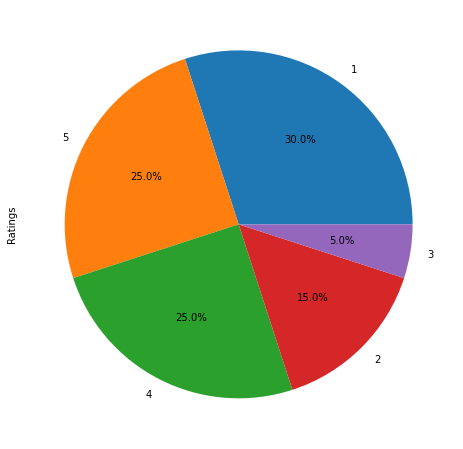

In [26]:
result['Ratings'].value_counts().plot(kind = 'pie', figsize = (8,8), autopct = '%1.1f%%')

In [27]:
#Olive Gardens
result1['Ratings'].value_counts()

1    11
5     4
4     4
2     1
Name: Ratings, dtype: int64

<AxesSubplot:ylabel='Ratings'>

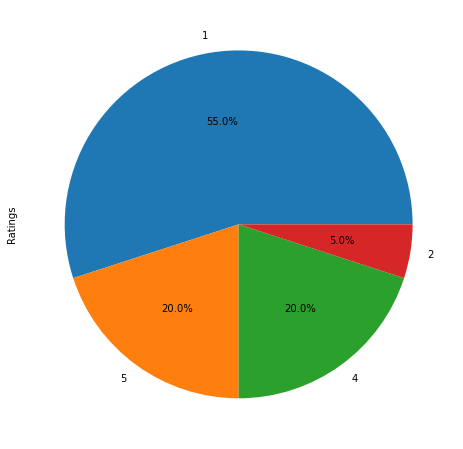

In [28]:
result1['Ratings'].value_counts().plot(kind = 'pie', figsize = (8, 8), autopct = '%1.1f%%')

# Sentimental Analysis of Cheesecake Factory

In [29]:
result['Ratings'] = pd.to_numeric(result['Ratings'])

In [30]:
result['Sentiment'] = ""
n = len(result['Ratings'])
for i in range(n):
    if result['Ratings'][i] > 3:
        result['Sentiment'][i] = "Positive"
    elif result['Ratings'][i] < 3:
        result['Sentiment'][i] = "Negative"
    else:
        result['Sentiment'][i] = "Neutral"

<ipython-input-30-675e032b9e93>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Sentiment'][i] = "Neutral"
<ipython-input-30-675e032b9e93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Sentiment'][i] = "Negative"
<ipython-input-30-675e032b9e93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Sentiment'][i] = "Positive"


In [31]:
result

,Author,Ratings,Review,Sentiment
0,Mardory V.,3,There&#x27;s a wait to be seated.\nThey didn&#...,Neutral
1,James B.,2,It&#x27;s a Cheesecake Factory! \n\nMade a res...,Negative
2,Terri R.,1,Well it took 45 to 1hr for a chicken salad san...,Negative
3,Steve Z.,2,Hard review to write....\n\nNever been to a Ch...,Negative
4,Ashley F.,5,Standard cheesscake factory. I like how this p...,Positive
5,Jacqueline Z.,5,I have had many many good experiences and very...,Positive
6,Milko P.,4,"When arriving, my friends and I were told that...",Positive
7,T. G.,5,Honestly was so impressed! I haven&#x27;t been...,Positive
8,Sitara S.,4,I feel like this is a spot we&#x27;ve all been...,Positive
9,Jeanette N.,4,This was probably the least crowded and cleane...,Positive


In [32]:
result1['Ratings'] = pd.to_numeric(result1['Ratings'])

In [33]:
n = len(result1['Ratings'])
result1['Sentiment'] = ""
for i in range(n):
    if result1['Ratings'][i] > 3:
        result1['Sentiment'][i] = "Positive"
    elif result1['Ratings'][i] < 3:
        result1['Sentiment'][i] = "Negative"
    else:
        result1['Sentiment'][i] = "Neutral"

<ipython-input-33-a5079afec0cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['Sentiment'][i] = "Positive"
<ipython-input-33-a5079afec0cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result1['Sentiment'][i] = "Negative"


In [34]:
result1

,Author,Ratings,Review,Sentiment
0,Lajja M.,5,I was craving olive garden special salad and s...,Positive
1,Maggie B.,4,I came here around 3:30pm on a Sunday. It was ...,Positive
2,Ethan W.,4,While on vacation in New Jersey with my lovely...,Positive
3,Valli S.,5,"By far, this is the best linguine with White c...",Positive
4,Shopper G.,1,Terrible service if I could give this place ze...,Negative
5,INDIA O.,2,"Service was slow, food is mediocre and didn&#x...",Negative
6,Jennah K.,1,Terrible service. Rude bartenders who had majo...,Negative
7,Claudio P.,1,My wife and I were driving through Secaucus an...,Negative
8,Lizeth A.,1,I went with my family with 12 people and they ...,Negative
9,Donna T L.,1,I don&#x27;t know why I&#x27;m being pestered ...,Negative


In [35]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')

In [38]:
stop_list = ['x27','a','#','s','n','I','cheesecake','Cheesecake']
stop_words.extend(stop_list)

In [39]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
word_tokens = word_tokenize(str(result['Review']))
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
print(word_tokens)
print(filtered_sentence)

['0', 'There', '&', '#', 'x27', ';', 's', 'a', 'wait', 'to', 'be', 'seated.\\nThey', 'didn', '&', '#', '...', '1', 'It', '&', '#', 'x27', ';', 's', 'a', 'Cheesecake', 'Factory', '!', '\\n\\nMade', 'a', 'res', '...', '2', 'Well', 'it', 'took', '45', 'to', '1hr', 'for', 'a', 'chicken', 'salad', 'san', '...', '3', 'Hard', 'review', 'to', 'write', '....', '\\n\\nNever', 'been', 'to', 'a', 'Ch', '...', '4', 'Standard', 'cheesscake', 'factory', '.', 'I', 'like', 'how', 'this', 'p', '...', '5', 'I', 'have', 'had', 'many', 'many', 'good', 'experiences', 'and', 'very', '...', '6', 'When', 'arriving', ',', 'my', 'friends', 'and', 'I', 'were', 'told', 'that', '...', '7', 'Honestly', 'was', 'so', 'impressed', '!', 'I', 'haven', '&', '#', 'x27', ';', 't', 'been', '...', '8', 'I', 'feel', 'like', 'this', 'is', 'a', 'spot', 'we', '&', '#', 'x27', ';', 've', 'all', 'been', '...', '9', 'This', 'was', 'probably', 'the', 'least', 'crowded', 'and', 'cleane', '...', '10', 'Ordered', 'many', 'times', 'takeo

In [41]:
positive = result[result['Sentiment'] == "Positive"]
negative = result[result['Sentiment'] == "Negative"]
neutral = result[result['Sentiment'] == "Neutral"]

# Analyzing Top Reviews by Sorting NB_words & Ratings for Cheesecake Factory

## Positive Reviews

In [42]:
positive["nb_words"] = positive['Review'].apply(lambda x: len(x.split(" ")))

<ipython-input-42-60f219111faf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive["nb_words"] = positive['Review'].apply(lambda x: len(x.split(" ")))


In [43]:
# create doc2vec vector columns
!pip install gensim

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(positive['Review'].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size = 5, window = 2, min_count = 1, workers = 4)

# transform each document into a vector data
doc2vec_df = positive['Review'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
positive = pd.concat([positive, doc2vec_df], axis = 1)

In [44]:
# add tf-idfs columns
from nltk import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(positive['Review']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = positive.index
positive = pd.concat([positive, tfidf_df], axis = 1)

In [45]:
positive.sort_values(by = ['Ratings','nb_words'], ascending = False)

,Author,Ratings,Review,Sentiment,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_and,word_the
12,Nicole W.,5,I&#x27;ve been meaning to come here for Happy ...,Positive,278,-0.676177,0.777171,-4.803750,-2.443453,0.332089,0.630593,0.776114
4,Ashley F.,5,Standard cheesscake factory. I like how this p...,Positive,145,-0.425283,0.491913,-2.671991,-1.383508,0.171408,0.485643,0.874157
7,T. G.,5,Honestly was so impressed! I haven&#x27;t been...,Positive,86,-0.219848,0.277549,-1.427998,-0.880574,0.189932,0.832050,0.554700
5,Jacqueline Z.,5,I have had many many good experiences and very...,Positive,79,-0.231742,0.278320,-1.445747,-0.768646,0.187620,0.600000,0.800000
15,Paddle O.,5,This place has the best cheesecake on earth. T...,Positive,31,-0.180642,0.014982,-0.525606,-0.409872,0.140290,0.707107,0.707107
6,Milko P.,4,"When arriving, my friends and I were told that...",Positive,240,-0.764897,0.643376,-4.003613,-2.062243,0.189217,0.624695,0.780869
8,Sitara S.,4,I feel like this is a spot we&#x27;ve all been...,Positive,237,-0.817158,0.614691,-4.190213,-2.092156,0.427894,0.485643,0.874157
10,Yulu H.,4,Ordered many times takeouts during the whole p...,Positive,158,-0.449831,0.426565,-2.589504,-1.480162,0.109071,0.672673,0.739940
17,Andrew L.,4,Had another solid meal at the Cheesecake Facto...,Positive,74,-0.139486,0.120876,-1.172300,-0.662614,0.123878,0.707107,0.707107
9,Jeanette N.,4,This was probably the least crowded and cleane...,Positive,48,-0.277569,0.124403,-1.079847,-0.576863,0.059622,0.316228,0.948683


## Negative Reviews

In [46]:
negative["nb_words"] = negative['Review'].apply(lambda x: len(x.split(" ")))

<ipython-input-46-99bef47d2eed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative["nb_words"] = negative['Review'].apply(lambda x: len(x.split(" ")))


In [47]:
# create doc2vec vector columns
!pip install gensim

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(negative['Review'].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size = 5, window = 2, min_count = 1, workers = 4)

# transform each document into a vector data
doc2vec_df = negative['Review'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
negative = pd.concat([negative, doc2vec_df], axis = 1)

In [48]:
# add tf-idfs columns
from nltk import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 10)
tfidf_result = tfidf.fit_transform(negative['Review']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = negative.index
negative = pd.concat([negative, tfidf_df], axis = 1)

In [49]:
negative.sort_values(by = ['Ratings', 'nb_words'], ascending = False)

,Author,Ratings,Review,Sentiment,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,...,word_write,word_wrong,word_x27,word_x2f,word_year,word_yes,word_yet,word_you,word_young,word_your
3,Steve Z.,2,Hard review to write....\n\nNever been to a Ch...,Negative,195,-0.476905,-0.043718,-3.566891,-4.186454,0.029229,...,0.060151,0.000000,0.148105,0.000000,0.071216,0.000000,0.000000,0.092418,0.000000,0.000000
13,Michelle T.,2,I placed an order online for two entrees and t...,Negative,114,-0.379061,-0.041895,-2.049502,-2.498433,0.103208,...,0.000000,0.000000,0.155616,0.000000,0.000000,0.000000,0.099771,0.000000,0.000000,0.084268
1,James B.,2,It&#x27;s a Cheesecake Factory! \n\nMade a res...,Negative,63,-0.227057,0.020638,-1.339253,-1.637471,-0.001260,...,0.000000,0.000000,0.080995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,Gabe O.,1,Busy and lack of good customer service. \nWe a...,Negative,523,-1.082409,-0.136914,-7.023146,-8.201326,0.051600,...,0.000000,0.026374,0.032470,0.062453,0.000000,0.031226,0.000000,0.121569,0.031226,0.052749
19,ILya V.,1,Originally I wasn&#x27;t gonna write anything....,Negative,104,-0.312410,0.049314,-1.746030,-2.097975,0.082029,...,0.094033,0.000000,0.347298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Terri R.,1,Well it took 45 to 1hr for a chicken salad san...,Negative,98,-0.385983,0.034088,-1.925861,-2.326334,-0.027123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,Abhi P.,1,Horrible service \n\nAfter having a reservatio...,Negative,90,-0.347043,0.027821,-1.494726,-1.925064,-0.006496,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,Akansha G.,1,I went there as a tourist and thought of havin...,Negative,86,-0.354314,-0.094405,-1.602831,-1.952524,-0.090380,...,0.000000,0.102333,0.188976,0.000000,0.000000,0.000000,0.000000,0.078615,0.000000,0.000000
14,Arina M.,1,Food was ok if you hungry. waiting timed or fo...,Negative,70,-0.231572,0.033238,-1.147907,-1.459891,0.085451,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088937,0.000000,0.000000


# Creating Histogram for Visual Representation (Cheesecake Factory)

In [50]:
!pip install plotly
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [51]:
fig = px.histogram(result, x = "Sentiment")
fig.update_traces(marker_color = "navy", marker_line_color = 'rgb(8, 48, 107)',
                  marker_line_width = 1.5)
fig.update_layout(title_text = 'Consumer Sentiment')
fig.show()

# Sentimental Analysis on Olive Gardens

In [52]:
from nltk.tokenize import word_tokenize
stop_words1 = stopwords.words('english')

In [53]:
print(stop_words1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
stop_list1 = ['x27','a','#','s','n','I','olive','garden','x','x2F','Salad']
stop_words1.extend(stop_list1)

In [55]:
word_tokens1 = word_tokenize(str(result1['Review']))
 
filtered_sentence1 = [w for w in word_tokens1 if not w.lower() in stop_words1]
 
filtered_sentence1 = []
 
for w in word_tokens1:
    if w not in stop_words1:
        filtered_sentence1.append(w)
print(word_tokens1)
print(filtered_sentence1)

['0', 'I', 'was', 'craving', 'olive', 'garden', 'special', 'salad', 'and', 's', '...', '1', 'I', 'came', 'here', 'around', '3:30pm', 'on', 'a', 'Sunday', '.', 'It', 'was', '...', '2', 'While', 'on', 'vacation', 'in', 'New', 'Jersey', 'with', 'my', 'lovely', '...', '3', 'By', 'far', ',', 'this', 'is', 'the', 'best', 'linguine', 'with', 'White', 'c', '...', '4', 'Terrible', 'service', 'if', 'I', 'could', 'give', 'this', 'place', 'ze', '...', '5', 'Service', 'was', 'slow', ',', 'food', 'is', 'mediocre', 'and', 'didn', '&', '#', 'x', '...', '6', 'Terrible', 'service', '.', 'Rude', 'bartenders', 'who', 'had', 'majo', '...', '7', 'My', 'wife', 'and', 'I', 'were', 'driving', 'through', 'Secaucus', 'an', '...', '8', 'I', 'went', 'with', 'my', 'family', 'with', '12', 'people', 'and', 'they', '...', '9', 'I', 'don', '&', '#', 'x27', ';', 't', 'know', 'why', 'I', '&', '#', 'x27', ';', 'm', 'being', 'pestered', '...', '10', 'My', 'wife', 'and', 'I', 'ordered', 'To', 'Go', 'Salads', 'from', 'this',

In [56]:
positive_o = result1[result1['Sentiment'] == "Positive"]
negative_o = result1[result1['Sentiment'] == "Negative"]
neutral_o = result1[result1['Sentiment'] == "Neutral"]

# Analyzing Top Reviews by Sorting NB_words & Ratings for Olive Gardens

## Positive Reviews 

In [57]:
positive_o["nb_words"] = positive_o['Review'].apply(lambda x: len(x.split(" ")))

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(positive_o['Review'].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size = 5, window = 2, min_count = 1, workers = 4)

# transform each document into a vector data
doc2vec_df = positive_o['Review'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
positive_o = pd.concat([positive_o, doc2vec_df], axis = 1)

# add tf-idfs columns
from nltk import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 10)
tfidf_result = tfidf.fit_transform(positive_o['Review']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = positive_o.index
positive_o = pd.concat([positive_o, tfidf_df], axis = 1)

positive_o.sort_values(by = ['Ratings', 'nb_words'], ascending = False )


<ipython-input-57-56761eedd797>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Author,Ratings,Review,Sentiment,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,...,word_wrong,word_x27,word_x2f,word_year,word_years,word_yes,word_you,word_your,word_yummy,word_ziti
11,Yuribel A.,5,My favorite Olive Garden restaurant of all tim...,Positive,170,-0.284778,-0.905162,-1.491924,-1.168557,0.240524,...,0.000000,0.119776,0.000000,0.000000,0.071134,0.00000,0.284371,0.102887,0.071134,0.000000
18,Chaitanya E.,5,Excellent customer service. I was handed the w...,Positive,80,-0.147748,-0.460384,-0.731691,-0.668034,0.200842,...,0.094953,0.063591,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
0,Lajja M.,5,I was craving olive garden special salad and s...,Positive,64,-0.179302,-0.316896,-0.456928,-0.411074,0.011180,...,0.075863,0.000000,0.452602,0.000000,0.000000,0.09052,0.045234,0.000000,0.000000,0.000000
3,Valli S.,5,"By far, this is the best linguine with White c...",Positive,26,-0.038527,-0.105165,-0.128516,-0.148903,-0.002691,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.112681,0.000000,0.000000,0.000000
1,Maggie B.,4,I came here around 3:30pm on a Sunday. It was ...,Positive,287,-0.384835,-1.742643,-2.640527,-2.479563,0.575347,...,0.000000,0.195362,0.000000,0.000000,0.000000,0.00000,0.124239,0.107881,0.000000,0.049724
19,Mitesh P.,4,In my path to continued support of restaurants...,Positive,133,-0.259598,-0.683503,-1.341416,-1.078622,0.161791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.042321,0.000000,0.000000,0.000000
13,Yvonne L.,4,The food is always so so delicious. I love Ita...,Positive,79,-0.228570,-0.468381,-0.802982,-0.708862,0.065377,...,0.000000,0.068838,0.000000,0.000000,0.000000,0.00000,0.061288,0.088697,0.000000,0.000000
2,Ethan W.,4,While on vacation in New Jersey with my lovely...,Positive,60,-0.051589,-0.376013,-0.615212,-0.482856,0.196499,...,0.000000,0.080044,0.000000,0.142612,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


## Negative Reviews

In [58]:
negative_o["nb_words"] = negative_o['Review'].apply(lambda x: len(x.split(" ")))

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(negative_o['Review'].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size = 5, window = 2, min_count = 1, workers = 4)

# transform each document into a vector data
doc2vec_df = negative_o['Review'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
negative_o = pd.concat([negative_o, doc2vec_df], axis = 1)

# add tf-idfs columns
from nltk import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 10)
tfidf_result = tfidf.fit_transform(negative_o['Review']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = negative_o.index
negative_o = pd.concat([negative_o, tfidf_df], axis = 1)

negative_o.sort_values(by = ['Ratings','nb_words'] )


<ipython-input-58-e8e0d38a656e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Author,Ratings,Review,Sentiment,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,...,word_will,word_win,word_with,word_without,word_would,word_wrong,word_x27,word_years,word_you,word_zero
14,Briana V.,1,I went there Food isn&#x27;t good it smelled r...,Negative,17,0.071565,-0.009941,-0.048035,-0.109611,-0.037733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145759,0.000000,0.000000,0.000000
15,Tony K.,1,The food and service is good but the crowd is ...,Negative,20,-0.122859,0.025432,-0.098766,-0.211573,0.054553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251496,0.000000
9,Donna T L.,1,I don&#x27;t know why I&#x27;m being pestered ...,Negative,45,-0.068582,0.123617,-0.296839,-0.328142,-0.042615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243349,0.184535,0.000000,0.000000
16,Megha S.,1,If there was an option I would give this place...,Negative,50,0.028425,0.160857,-0.175193,-0.458040,-0.061718,...,0.000000,0.000000,0.000000,0.000000,0.124557,0.000000,0.000000,0.000000,0.000000,0.000000
17,Joan A.,1,Rip off. I paid for a grand ma pie. Got a regu...,Negative,50,-0.098896,0.038728,-0.409305,-0.523939,-0.028008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069259,0.000000,0.000000,0.000000
6,Jennah K.,1,Terrible service. Rude bartenders who had majo...,Negative,54,-0.085535,0.029840,-0.331983,-0.533996,-0.086878,...,0.000000,0.000000,0.000000,0.000000,0.122318,0.000000,0.070874,0.000000,0.000000,0.000000
12,Liz G.,1,I really came to this restaurant for the first...,Negative,75,-0.119640,0.027755,-0.374300,-0.487893,-0.122460,...,0.000000,0.000000,0.103483,0.000000,0.115291,0.000000,0.066803,0.000000,0.000000,0.000000
8,Lizeth A.,1,I went with my family with 12 people and they ...,Negative,103,-0.049998,0.267493,-0.398989,-0.594124,-0.103465,...,0.000000,0.000000,0.118998,0.000000,0.000000,0.000000,0.038409,0.000000,0.000000,0.000000
7,Claudio P.,1,My wife and I were driving through Secaucus an...,Negative,117,-0.124948,0.337909,-0.663232,-0.975134,-0.105836,...,0.000000,0.000000,0.070610,0.000000,0.000000,0.000000,0.091164,0.000000,0.000000,0.000000
4,Shopper G.,1,Terrible service if I could give this place ze...,Negative,131,-0.188221,0.335297,-0.640748,-0.926060,-0.110945,...,0.000000,0.000000,0.000000,0.094759,0.000000,0.081381,0.000000,0.000000,0.000000,0.094759


In [59]:
# Creating Histogram for Visual Representation (Olive Gardens)

In [60]:
fig = px.histogram(result1, x = "Sentiment")
fig.update_traces(marker_color = "navy", marker_line_color = 'rgb(8, 48, 107)',
                  marker_line_width = 1.5)
fig.update_layout(title_text = 'Consumer Sentiment')
fig.show()

# Sentimental Analysis using TextBlob 

## For Cheesecake Factory

In [61]:
# Preprocessing

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
result['Cleaned Reviews'] = result['Review'].apply(clean)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [85]:
# POS tagging
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

result['POS tagged'] = result['Cleaned Reviews'].apply(token_stop_pos)


In [63]:
# Retreiving stem words
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos = pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

result['Lemma'] = result['POS tagged'].apply(lemmatize)

In [64]:
result

,Author,Ratings,Review,Sentiment,Cleaned Reviews,POS tagged,Lemma
0,Mardory V.,3,There&#x27;s a wait to be seated.\nThey didn&#...,Neutral,There x s a wait to be seated nThey didn x t a...,"[(x, v), (wait, n), (seated, v), (nThey, a), (...",x wait seat nThey x ask vaccination require ...
1,James B.,2,It&#x27;s a Cheesecake Factory! \n\nMade a res...,Negative,It x s a Cheesecake Factory n nMade a reservat...,"[(x, v), (Cheesecake, n), (Factory, n), (n, r)...",x Cheesecake Factory n nMade reservation pm ...
2,Terri R.,1,Well it took 45 to 1hr for a chicken salad san...,Negative,Well it took to hr for a chicken salad sandwic...,"[(Well, None), (took, v), (hr, v), (chicken, n...",Well take hr chicken salad sandwich upon ask...
3,Steve Z.,2,Hard review to write....\n\nNever been to a Ch...,Negative,Hard review to write n nNever been to a Cheese...,"[(Hard, n), (review, n), (write, v), (n, a), (...",Hard review write n nNever Cheesecake Factor...
4,Ashley F.,5,Standard cheesscake factory. I like how this p...,Positive,Standard cheesscake factory I like how this pl...,"[(Standard, n), (cheesscake, v), (factory, n),...",Standard cheesscake factory like place attac...
5,Jacqueline Z.,5,I have had many many good experiences and very...,Positive,I have had many many good experiences and very...,"[(many, a), (many, a), (good, a), (experiences...",many many good experience meh experience Che...
6,Milko P.,4,"When arriving, my friends and I were told that...",Positive,When arriving my friends and I were told that ...,"[(arriving, v), (friends, n), (told, v), (wait...",arrive friend tell wait booth would minute h...
7,T. G.,5,Honestly was so impressed! I haven&#x27;t been...,Positive,Honestly was so impressed I haven x t been bac...,"[(Honestly, r), (impressed, a), (x, a), (back,...",Honestly impressed x back review mixed decid...
8,Sitara S.,4,I feel like this is a spot we&#x27;ve all been...,Positive,I feel like this is a spot we x ve all been to...,"[(feel, v), (like, None), (spot, n), (x, v), (...",feel like spot x least live NJ x definitely ...
9,Jeanette N.,4,This was probably the least crowded and cleane...,Positive,This was probably the least crowded and cleane...,"[(probably, r), (least, a), (crowded, a), (cle...",probably least crowded clean Cheesecake Fact...


In [65]:
#Using TextBlob
!pip install textblob
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

result_f = pd.DataFrame(result[['Review', 'Lemma']])
result_f['Polarity'] = result_f['Lemma'].apply(getPolarity) 
result_f['Analysis'] = result_f['Polarity'].apply(analysis)
result_f.head()
result_f


,Review,Lemma,Polarity,Analysis
0,There&#x27;s a wait to be seated.\nThey didn&#...,x wait seat nThey x ask vaccination require ...,0.043750,Positive
1,It&#x27;s a Cheesecake Factory! \n\nMade a res...,x Cheesecake Factory n nMade reservation pm ...,0.130952,Positive
2,Well it took 45 to 1hr for a chicken salad san...,Well take hr chicken salad sandwich upon ask...,-0.078571,Negative
3,Hard review to write....\n\nNever been to a Ch...,Hard review write n nNever Cheesecake Factor...,0.030238,Positive
4,Standard cheesscake factory. I like how this p...,Standard cheesscake factory like place attac...,0.142297,Positive
5,I have had many many good experiences and very...,many many good experience meh experience Che...,0.202424,Positive
6,"When arriving, my friends and I were told that...",arrive friend tell wait booth would minute h...,0.085662,Positive
7,Honestly was so impressed! I haven&#x27;t been...,Honestly impressed x back review mixed decid...,0.427273,Positive
8,I feel like this is a spot we&#x27;ve all been...,feel like spot x least live NJ x definitely ...,0.135074,Positive
9,This was probably the least crowded and cleane...,probably least crowded clean Cheesecake Fact...,0.255556,Positive


In [66]:
total_counts = result_f.Analysis.value_counts()

total_counts

Positive    16
Negative     4
Name: Analysis, dtype: int64

# Sentimental Analysis using VADER

In [67]:
#vader

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
result['scores'] = result['Review'].apply(lambda review: analyzer.polarity_scores(review))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [68]:
result['compound']  = result['scores'].apply(lambda score_dict: score_dict['compound'])

In [69]:
result['compound_score'] = result['compound'].apply(lambda c: 'Positive' if c >= 0 else 'Negative')

In [70]:
result

,Author,Ratings,Review,Sentiment,Cleaned Reviews,POS tagged,Lemma,scores,compound,compound_score
0,Mardory V.,3,There&#x27;s a wait to be seated.\nThey didn&#...,Neutral,There x s a wait to be seated nThey didn x t a...,"[(x, v), (wait, n), (seated, v), (nThey, a), (...",x wait seat nThey x ask vaccination require ...,"{'neg': 0.023, 'neu': 0.891, 'pos': 0.086, 'co...",0.5267,Positive
1,James B.,2,It&#x27;s a Cheesecake Factory! \n\nMade a res...,Negative,It x s a Cheesecake Factory n nMade a reservat...,"[(x, v), (Cheesecake, n), (Factory, n), (n, r)...",x Cheesecake Factory n nMade reservation pm ...,"{'neg': 0.028, 'neu': 0.772, 'pos': 0.2, 'comp...",0.8847,Positive
2,Terri R.,1,Well it took 45 to 1hr for a chicken salad san...,Negative,Well it took to hr for a chicken salad sandwic...,"[(Well, None), (took, v), (hr, v), (chicken, n...",Well take hr chicken salad sandwich upon ask...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.8519,Positive
3,Steve Z.,2,Hard review to write....\n\nNever been to a Ch...,Negative,Hard review to write n nNever been to a Cheese...,"[(Hard, n), (review, n), (write, v), (n, a), (...",Hard review write n nNever Cheesecake Factor...,"{'neg': 0.047, 'neu': 0.892, 'pos': 0.06, 'com...",0.6674,Positive
4,Ashley F.,5,Standard cheesscake factory. I like how this p...,Positive,Standard cheesscake factory I like how this pl...,"[(Standard, n), (cheesscake, v), (factory, n),...",Standard cheesscake factory like place attac...,"{'neg': 0.081, 'neu': 0.827, 'pos': 0.092, 'co...",-0.1090,Negative
5,Jacqueline Z.,5,I have had many many good experiences and very...,Positive,I have had many many good experiences and very...,"[(many, a), (many, a), (good, a), (experiences...",many many good experience meh experience Che...,"{'neg': 0.014, 'neu': 0.719, 'pos': 0.267, 'co...",0.9767,Positive
6,Milko P.,4,"When arriving, my friends and I were told that...",Positive,When arriving my friends and I were told that ...,"[(arriving, v), (friends, n), (told, v), (wait...",arrive friend tell wait booth would minute h...,"{'neg': 0.038, 'neu': 0.745, 'pos': 0.217, 'co...",0.9940,Positive
7,T. G.,5,Honestly was so impressed! I haven&#x27;t been...,Positive,Honestly was so impressed I haven x t been bac...,"[(Honestly, r), (impressed, a), (x, a), (back,...",Honestly impressed x back review mixed decid...,"{'neg': 0.027, 'neu': 0.664, 'pos': 0.309, 'co...",0.9853,Positive
8,Sitara S.,4,I feel like this is a spot we&#x27;ve all been...,Positive,I feel like this is a spot we x ve all been to...,"[(feel, v), (like, None), (spot, n), (x, v), (...",feel like spot x least live NJ x definitely ...,"{'neg': 0.095, 'neu': 0.764, 'pos': 0.141, 'co...",0.8834,Positive
9,Jeanette N.,4,This was probably the least crowded and cleane...,Positive,This was probably the least crowded and cleane...,"[(probably, r), (least, a), (crowded, a), (cle...",probably least crowded clean Cheesecake Fact...,"{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'comp...",0.6476,Positive


In [71]:
total_counts_v = result.compound_score.value_counts()

total_counts_v

Positive    15
Negative     5
Name: compound_score, dtype: int64

## Comparing both TextBlob & VADER Results (Cheesecake Factory)

([<matplotlib.patches.Wedge at 0x21e4d434340>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Positive'),
  Text(0.7778174593052022, -0.7778174593052025, 'Negative')],
 [Text(-0.42426406871192845, 0.4242640687119285, '75.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

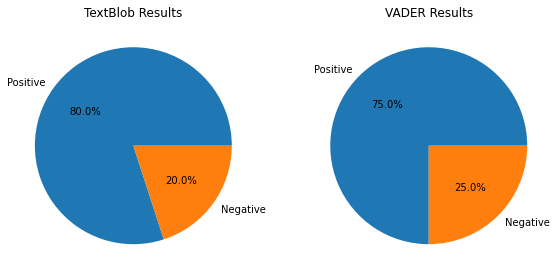

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15, 7))
plt.subplot(1, 3, 1)
plt.title("TextBlob Results")
plt.pie(total_counts.values, labels = total_counts.index, autopct = '%1.1f%%', shadow = False)
plt.subplot(1, 3, 2)
plt.title("VADER Results")
plt.pie(total_counts_v.values, labels = total_counts_v.index, autopct = '%1.1f%%', shadow = False)


# Sentimental Analysis using TextBlob

## For Olive Gardens

In [73]:
#Preprocessing

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean(text):
    
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
result1['Cleaned Reviews'] = result1['Review'].apply(clean)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:
# POS tagging
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

result1['POS tagged'] = result1['Cleaned Reviews'].apply(token_stop_pos)


In [75]:
#Retreiving stem words
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

result1['Lemma'] = result1['POS tagged'].apply(lemmatize)

In [76]:
result1

,Author,Ratings,Review,Sentiment,Cleaned Reviews,POS tagged,Lemma
0,Lajja M.,5,I was craving olive garden special salad and s...,Positive,I was craving olive garden special salad and s...,"[(craving, v), (olive, a), (garden, n), (speci...",crave olive garden special salad go order un...
1,Maggie B.,4,I came here around 3:30pm on a Sunday. It was ...,Positive,I came here around pm on a Sunday It was busy ...,"[(came, v), (around, r), (pm, v), (Sunday, n),...",come around pm Sunday busy bustle seat party...
2,Ethan W.,4,While on vacation in New Jersey with my lovely...,Positive,While on vacation in New Jersey with my lovely...,"[(vacation, n), (New, n), (Jersey, n), (lovely...",vacation New Jersey lovely wife decide x fun...
3,Valli S.,5,"By far, this is the best linguine with White c...",Positive,By far this is the best linguine with White cl...,"[(far, r), (best, a), (linguine, n), (White, n...",far best linguine White clam sauce mixed Bro...
4,Shopper G.,1,Terrible service if I could give this place ze...,Negative,Terrible service if I could give this place ze...,"[(Terrible, a), (service, n), (could, None), (...",Terrible service could give place zero start...
5,INDIA O.,2,"Service was slow, food is mediocre and didn&#x...",Negative,Service was slow food is mediocre and didn x t...,"[(Service, n), (slow, a), (food, n), (mediocre...",Service slow food mediocre x look appetizing...
6,Jennah K.,1,Terrible service. Rude bartenders who had majo...,Negative,Terrible service Rude bartenders who had major...,"[(Terrible, a), (service, n), (Rude, n), (bart...",Terrible service Rude bartender major attitu...
7,Claudio P.,1,My wife and I were driving through Secaucus an...,Negative,My wife and I were driving through Secaucus an...,"[(wife, n), (driving, v), (Secaucus, n), (deci...",wife drive Secaucus decide stop Olive Garden...
8,Lizeth A.,1,I went with my family with 12 people and they ...,Negative,I went with my family with people and they tol...,"[(went, v), (family, n), (people, n), (told, v...",go family people tell wait hour hour saw fam...
9,Donna T L.,1,I don&#x27;t know why I&#x27;m being pestered ...,Negative,I don x t know why I x m being pestered to lea...,"[(x, a), (know, v), (x, v), (pestered, v), (le...",x know x pester leave review restaurant x ye...


In [77]:
#Using TextBlob
!pip install textblob
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

result_f1 = pd.DataFrame(result1[['Review', 'Lemma']])
result_f1['Polarity'] = result_f1['Lemma'].apply(getPolarity) 
result_f1['Analysis'] = result_f1['Polarity'].apply(analysis)
result_f1


,Review,Lemma,Polarity,Analysis
0,I was craving olive garden special salad and s...,crave olive garden special salad go order un...,8.571429e-02,Positive
1,I came here around 3:30pm on a Sunday. It was ...,come around pm Sunday busy bustle seat party...,3.252976e-01,Positive
2,While on vacation in New Jersey with my lovely...,vacation New Jersey lovely wife decide x fun...,1.872727e-01,Positive
3,"By far, this is the best linguine with White c...",far best linguine White clam sauce mixed Bro...,4.200000e-01,Positive
4,Terrible service if I could give this place ze...,Terrible service could give place zero start...,-2.222222e-01,Negative
5,"Service was slow, food is mediocre and didn&#x...",Service slow food mediocre x look appetizing...,8.428571e-02,Positive
6,Terrible service. Rude bartenders who had majo...,Terrible service Rude bartender major attitu...,-4.125000e-01,Negative
7,My wife and I were driving through Secaucus an...,wife drive Secaucus decide stop Olive Garden...,2.375000e-01,Positive
8,I went with my family with 12 people and they ...,go family people tell wait hour hour saw fam...,1.300000e-01,Positive
9,I don&#x27;t know why I&#x27;m being pestered ...,x know x pester leave review restaurant x ye...,3.571429e-01,Positive


In [78]:
total_counts1 = result_f1.Analysis.value_counts()

total_counts1

Positive    17
Negative     3
Name: Analysis, dtype: int64

# Sentimental Analysis using VADER 

In [79]:
#vader

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
result1['scores'] = result1['Review'].apply(lambda review: analyzer.polarity_scores(review))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vivia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
result1['compound']  = result1['scores'].apply(lambda score_dict: score_dict['compound'])

In [81]:
result1['compound_score'] = result1['compound'].apply(lambda c: 'Positive' if c >= 0 else 'Negative')

In [82]:
result1

,Author,Ratings,Review,Sentiment,Cleaned Reviews,POS tagged,Lemma,scores,compound,compound_score
0,Lajja M.,5,I was craving olive garden special salad and s...,Positive,I was craving olive garden special salad and s...,"[(craving, v), (olive, a), (garden, n), (speci...",crave olive garden special salad go order un...,"{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'comp...",0.8502,Positive
1,Maggie B.,4,I came here around 3:30pm on a Sunday. It was ...,Positive,I came here around pm on a Sunday It was busy ...,"[(came, v), (around, r), (pm, v), (Sunday, n),...",come around pm Sunday busy bustle seat party...,"{'neg': 0.025, 'neu': 0.785, 'pos': 0.19, 'com...",0.9957,Positive
2,Ethan W.,4,While on vacation in New Jersey with my lovely...,Positive,While on vacation in New Jersey with my lovely...,"[(vacation, n), (New, n), (Jersey, n), (lovely...",vacation New Jersey lovely wife decide x fun...,"{'neg': 0.02, 'neu': 0.901, 'pos': 0.079, 'com...",0.5635,Positive
3,Valli S.,5,"By far, this is the best linguine with White c...",Positive,By far this is the best linguine with White cl...,"[(far, r), (best, a), (linguine, n), (White, n...",far best linguine White clam sauce mixed Bro...,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.8555,Positive
4,Shopper G.,1,Terrible service if I could give this place ze...,Negative,Terrible service if I could give this place ze...,"[(Terrible, a), (service, n), (could, None), (...",Terrible service could give place zero start...,"{'neg': 0.088, 'neu': 0.873, 'pos': 0.04, 'com...",-0.6588,Negative
5,INDIA O.,2,"Service was slow, food is mediocre and didn&#x...",Negative,Service was slow food is mediocre and didn x t...,"[(Service, n), (slow, a), (food, n), (mediocre...",Service slow food mediocre x look appetizing...,"{'neg': 0.09, 'neu': 0.802, 'pos': 0.109, 'com...",0.1154,Positive
6,Jennah K.,1,Terrible service. Rude bartenders who had majo...,Negative,Terrible service Rude bartenders who had major...,"[(Terrible, a), (service, n), (Rude, n), (bart...",Terrible service Rude bartender major attitu...,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compou...",-0.8316,Negative
7,Claudio P.,1,My wife and I were driving through Secaucus an...,Negative,My wife and I were driving through Secaucus an...,"[(wife, n), (driving, v), (Secaucus, n), (deci...",wife drive Secaucus decide stop Olive Garden...,"{'neg': 0.103, 'neu': 0.853, 'pos': 0.044, 'co...",-0.8258,Negative
8,Lizeth A.,1,I went with my family with 12 people and they ...,Negative,I went with my family with people and they tol...,"[(went, v), (family, n), (people, n), (told, v...",go family people tell wait hour hour saw fam...,"{'neg': 0.04, 'neu': 0.94, 'pos': 0.02, 'compo...",-0.4678,Negative
9,Donna T L.,1,I don&#x27;t know why I&#x27;m being pestered ...,Negative,I don x t know why I x m being pestered to lea...,"[(x, a), (know, v), (x, v), (pestered, v), (le...",x know x pester leave review restaurant x ye...,"{'neg': 0.093, 'neu': 0.864, 'pos': 0.043, 'co...",-0.2817,Negative


In [83]:
total_counts1_v = result1.compound_score.value_counts()

total_counts1_v

Positive    12
Negative     8
Name: compound_score, dtype: int64

## Comparing both TextBlob & VADER Results (Olive Gardens)

([<matplotlib.patches.Wedge at 0x21e4d34f6d0>,
 [Text(-0.33991877217145816, 1.046162142464278, 'Positive'),
  Text(0.3399188701202255, -1.0461621106387813, 'Negative')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.0%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.0%')])

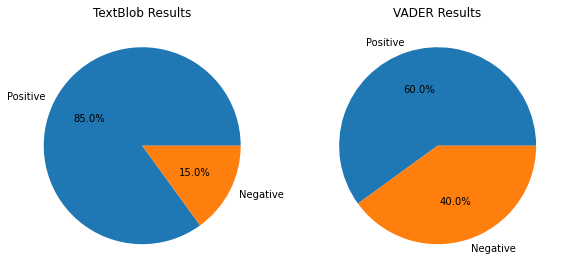

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15, 7))
plt.subplot(1, 3, 1)
plt.title("TextBlob Results")
plt.pie(total_counts1.values, labels = total_counts1.index, autopct = '%1.1f%%', shadow = False)
plt.subplot(1, 3, 2)
plt.title("VADER Results")
plt.pie(total_counts1_v.values, labels = total_counts1_v.index, autopct = '%1.1f%%', shadow = False)